# Classificação dos dados

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('tracks_features.csv')
df = df[df['year'] >= 1922]
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203880 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1203880 non-null  object 
 1   name              1203880 non-null  object 
 2   album             1203880 non-null  object 
 3   album_id          1203880 non-null  object 
 4   artists           1203880 non-null  object 
 5   artist_ids        1203880 non-null  object 
 6   track_number      1203880 non-null  int64  
 7   disc_number       1203880 non-null  int64  
 8   explicit          1203880 non-null  bool   
 9   danceability      1203880 non-null  float64
 10  energy            1203880 non-null  float64
 11  key               1203880 non-null  int64  
 12  loudness          1203880 non-null  float64
 13  mode              1203880 non-null  int64  
 14  speechiness       1203880 non-null  float64
 15  acousticness      1203880 non-null  float64
 16  

In [39]:
def obter_decada(linha):
    ano = str(linha['year'])
    return int(ano[:3] + "0")

df['decade'] = df.apply (lambda x: obter_decada(x), axis=1)

In [40]:
df = df[df['decade'] != "00"]
df.groupby('decade').size()

decade
1920       436
1930       453
1940       653
1950      3159
1960      8784
1970     17183
1980     28595
1990    153049
2000    423753
2010    498089
2020     69726
dtype: int64

### UtilIzando o KNN para comparar com os resultados obtidos no trabalho anterior
##### Músicas entre 1980 e 2019

In [41]:
# df_1980_a_2010 = df[(df['decade'] >= 1980) & (df['decade'] < 2020)]

df_1980 = df[df['decade'] == 1980].sample(n=5000)
df_1990 = df[df['decade'] == 1990].sample(n=5000)
df_2000 = df[df['decade'] == 2000].sample(n=5000)
df_2010 = df[df['decade'] == 2010].sample(n=5000)

df_1980_a_2010 = pd.concat([df_1980, df_1990, df_2000, df_2010], ignore_index=True, sort=False)

df_1980_a_2010.groupby('decade').size()

decade
1980    5000
1990    5000
2000    5000
2010    5000
dtype: int64

In [53]:
X = df_1980_a_2010[['danceability', 'energy', 'key', 'loudness', 'mode', 
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'time_signature']]
y = df_1980_a_2010['decade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

#### Gerando o melhor valor para n_neighbors

In [44]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(25, 250, 15)}
knn_gscv = GridSearchCV(knn, params)
knn_gscv.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 25,  40,  55,  70,  85, 100, 115, 130, 145, 160, 175, 190, 205,
       220, 235])})

In [45]:
best_k = knn_gscv.best_params_['n_neighbors']
print('Melhor resultado: ', best_k)

Melhor resultado:  100


#### Classificação

In [46]:
classifier = KNeighborsClassifier(
    n_neighbors=best_k, 
    p=4, # quantidade de décadas a serem testadas
    metric='euclidean')

In [47]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=100, p=4)

In [48]:
y_pred = classifier.predict(X_test)

In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[677 423 210 218]
 [473 527 240 285]
 [309 351 373 443]
 [315 273 304 579]]


In [50]:
# # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
print('f1_score: ', f1_score(y_test, y_pred, average='weighted'))

f1_score:  0.35613417751718224


In [51]:
print('accuracy_score:', accuracy_score(y_test, y_pred))

accuracy_score: 0.35933333333333334


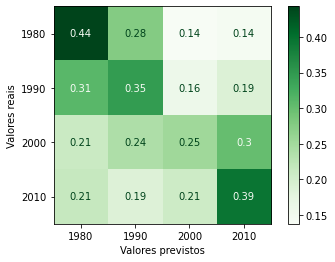

In [52]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                             display_labels=[1980, 1990, 2000, 2010],
                             cmap=plt.cm.Greens,
                             normalize='true')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.show()